# Employee Analysis | Attrition Report

# Content

From this dataset we are predicting attrition rate of valuable employees.

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'


<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive">Importing Libraries </h2>
</div>

In [1]:
# Essentials and data wrangling libraries
import numpy as np
import pandas as pd
import datetime
import random

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Misc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# libraries for models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

# metrics evaluation libraries
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore")


<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive"> Importing Dataset </h2>
</div>

In [2]:
df = pd.read_csv("HR Employee Attrition.csv")

In [3]:
display(df.head(5))

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<div id="exploratory-data-analysis"
     style = "display: fill;
              border-radius: 5px;
              background-color: orange">
    <h4 style = "padding: 15px; 
                 color: black;
                 text-align: left;
                 font-family: Trebuchet MS;">EXPLORATORY DATA ANALYSIS
    </h4>
</div>

<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive"> Categorical columns </h2>
</div>

In [9]:
cat_columns = [col for col in df.columns if df[col].dtype == object]
cat_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive">Q1) Business travel count of employees?</h2>
</div>


In [10]:
businessTravel_df = df['BusinessTravel'].value_counts()

fig = px.bar(businessTravel_df, x=businessTravel_df.index, y=businessTravel_df.values, color=businessTravel_df.index, 
       text=businessTravel_df.values, title="Business travel count of employees")
fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="Travel details",
    yaxis_title="Count",
    font = dict(size=15))
fig.show()

From the above graph, we can observe that most of the employees in the organization travel rarely

<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive">Q2) Employee count per department?</h2>
</div>

In [11]:
department_df = df['Department'].value_counts()

fig = px.bar(department_df, x=department_df.index, y=department_df.values, color=department_df.index, text= department_df.values,
      title="Employee per department")
fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="Department",
    yaxis_title="Count",
    font = dict(size=17))
fig.show()

<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive">Q3) Employee count per educational field?</h2>
</div>

In [12]:
educationField_df = df['EducationField'].value_counts()

fig = px.bar(educationField_df, x=educationField_df.index, y=educationField_df.values, color=educationField_df.index, 
             text=educationField_df.values, title="Educational field of employees")
fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="EducationField",
    yaxis_title="Count",
    font = dict(size=17))
fig.show()

<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive">Q4) Gender wise distribution of employees?</h2>
</div>

In [13]:
gender_df = df['Gender'].value_counts()

plt.figure(figsize = (15, 8))
fig = px.pie(gender_df, values=gender_df.values, names=gender_df.index, hole=.4, color=gender_df.index,
            color_discrete_map={'Male':'cyan','Female':'royalblue'}, title="Gender wise distribution")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<Figure size 1080x576 with 0 Axes>


<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive">Q5) Job role wise distribution of employees?</h2>
</div>

In [14]:
jobRole_df = df['JobRole'].value_counts()

fig = px.bar(jobRole_df, x=jobRole_df.index, y=jobRole_df.values, color=jobRole_df.index, 
             text=jobRole_df.values, title="Job role wise distribution of employees")
fig.update_traces(width=0.4)
fig.update_layout(
    xaxis_title="Job Role",
    yaxis_title="Count",
    font = dict(size=17))
fig.show()

<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive">Q6) Marital status percentage of employees?</h2>
</div>

In [15]:
maritalStatus_df = df['MaritalStatus'].value_counts()

plt.figure(figsize = (15, 8))
fig = px.pie(maritalStatus_df, values=maritalStatus_df.values, names=maritalStatus_df.index, hole=.4, 
             color=maritalStatus_df.index,
             title="Marital status of employees")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<Figure size 1080x576 with 0 Axes>

<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive">Q7) Percentage of employees are taking overtime?</h2>
</div>

In [16]:
overTime_df = df['OverTime'].value_counts()

plt.figure(figsize = (15, 8))
fig = px.pie(overTime_df, values=overTime_df.values, names=overTime_df.index, hole=.4, color=overTime_df.index,
            color_discrete_map={'Yes':'black','No':'pink'}, title="Gender wise distribution")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<Figure size 1080x576 with 0 Axes>

<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive">Numerical columns</h2>
</div>

In [17]:
numerical_cols = [col for col in df.columns if df[col].dtype == 'int64'] 
numerical_cols[:10]

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel']

<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive">Distribution of Numerical columns</h2>
</div>

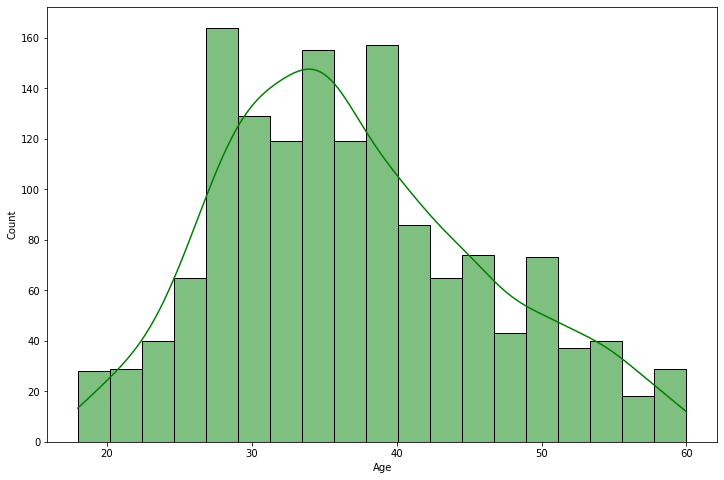

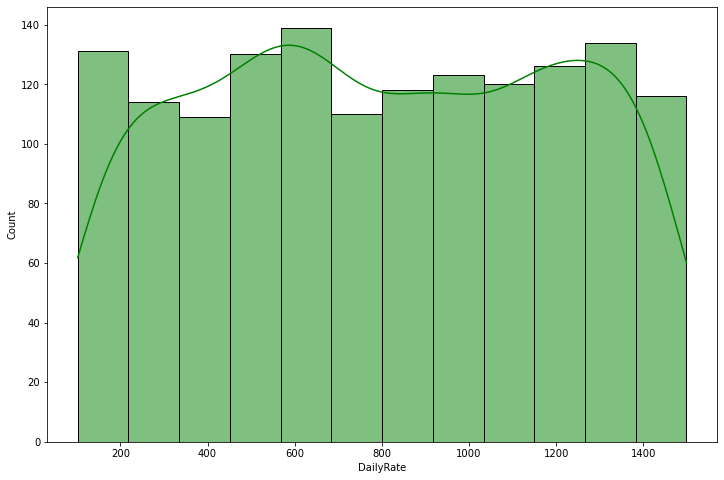

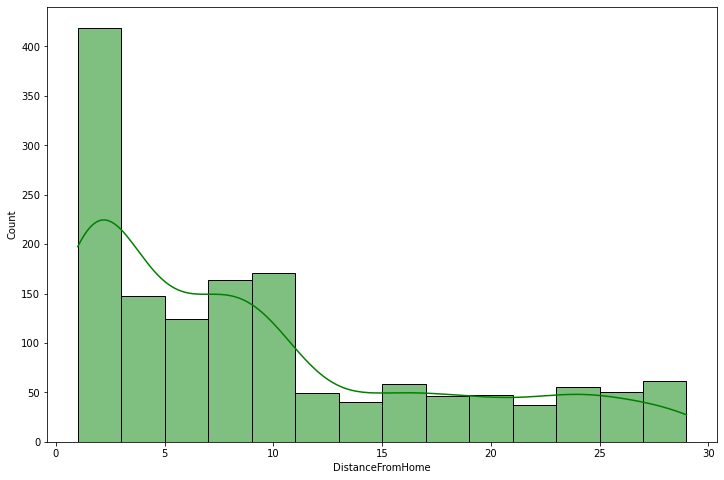

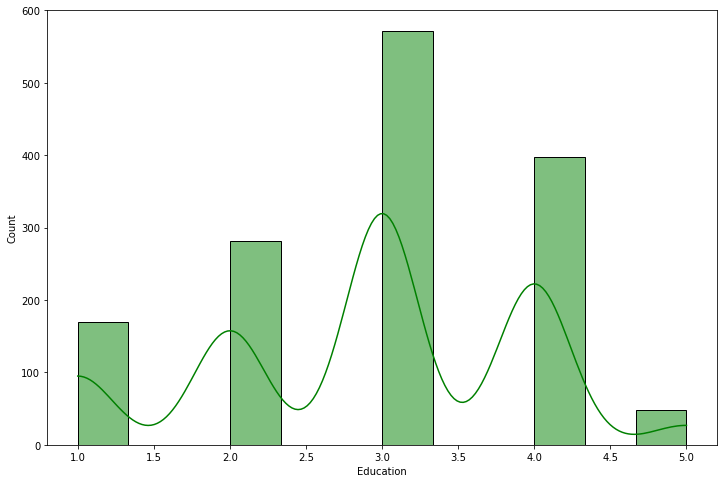

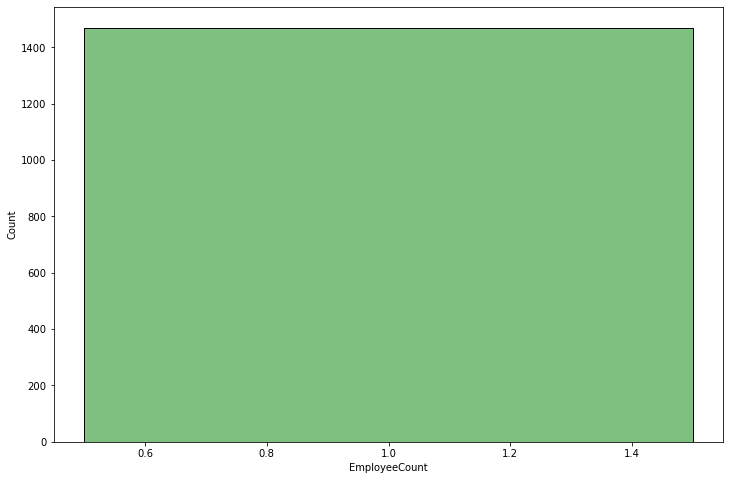

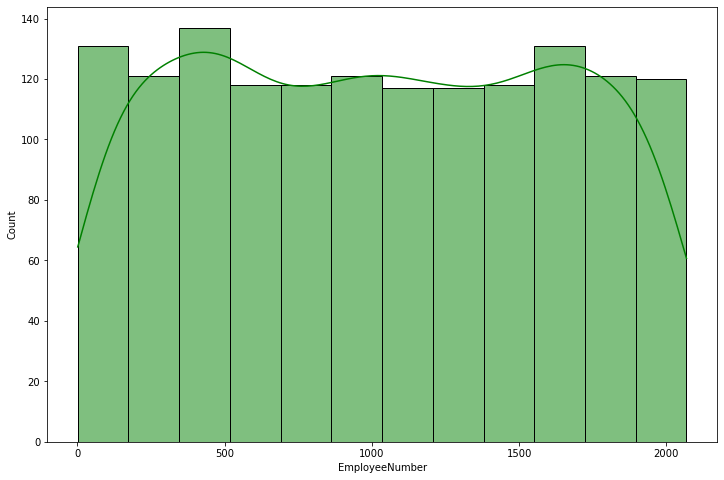

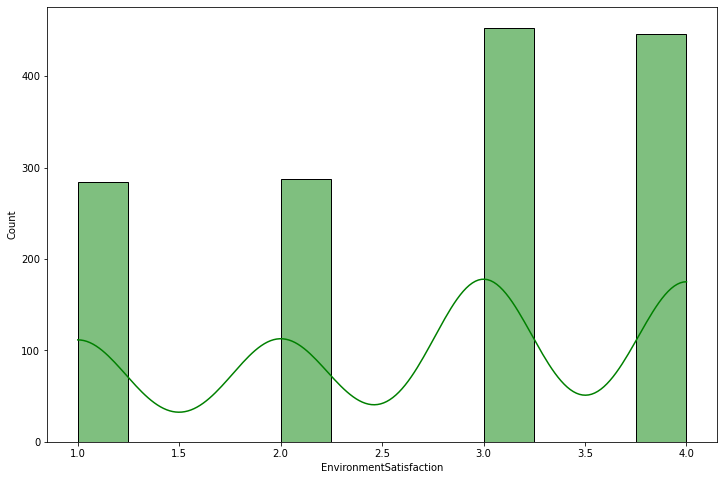

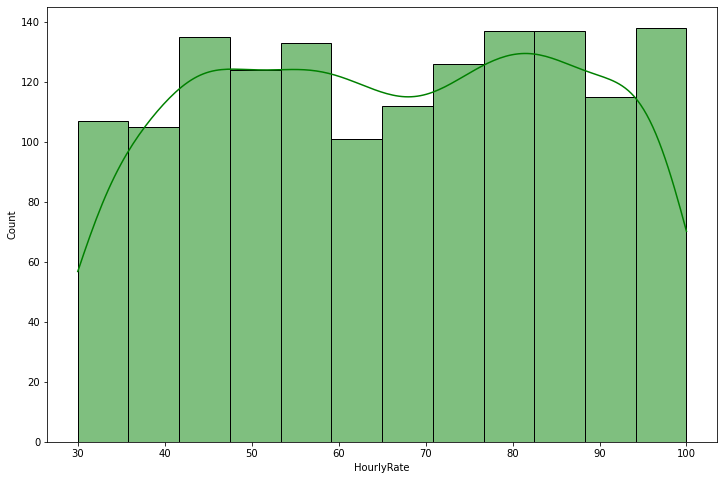

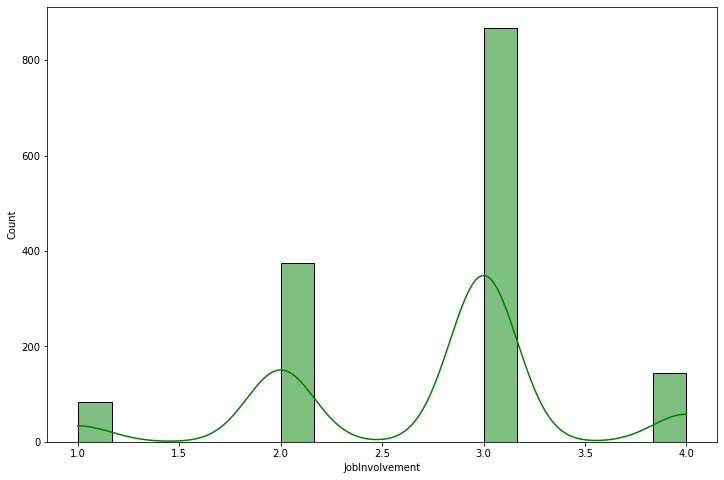

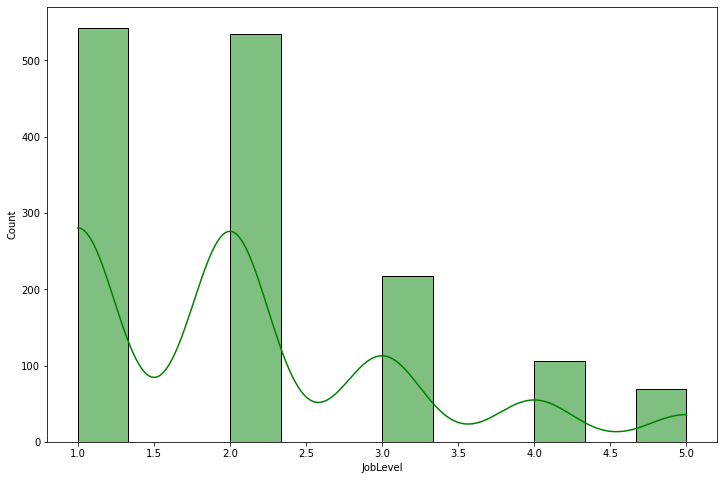

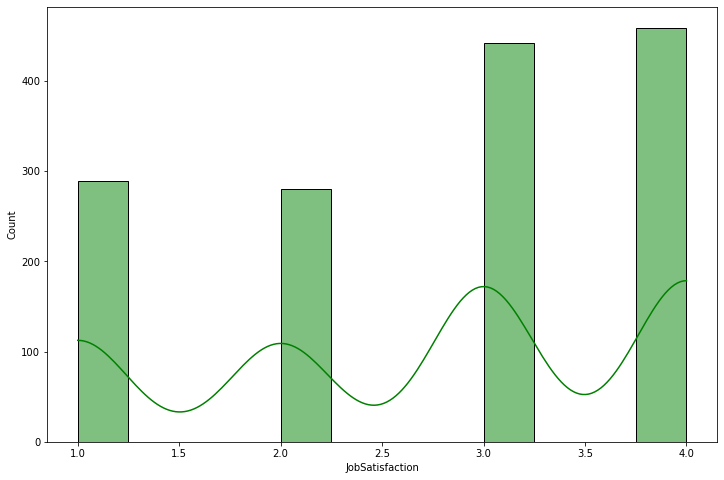

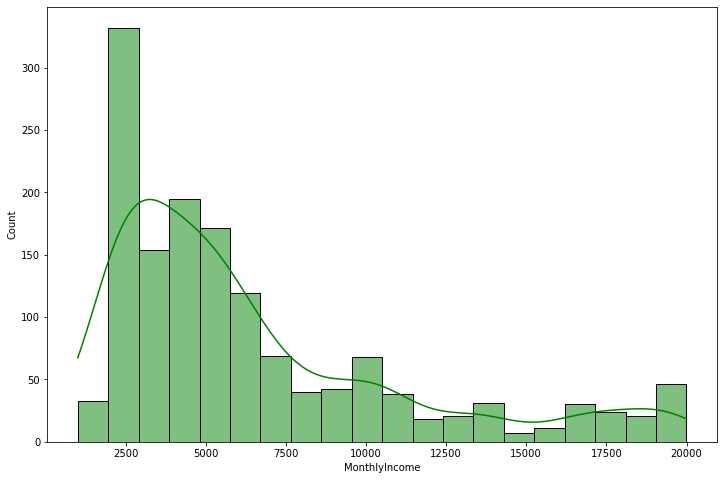

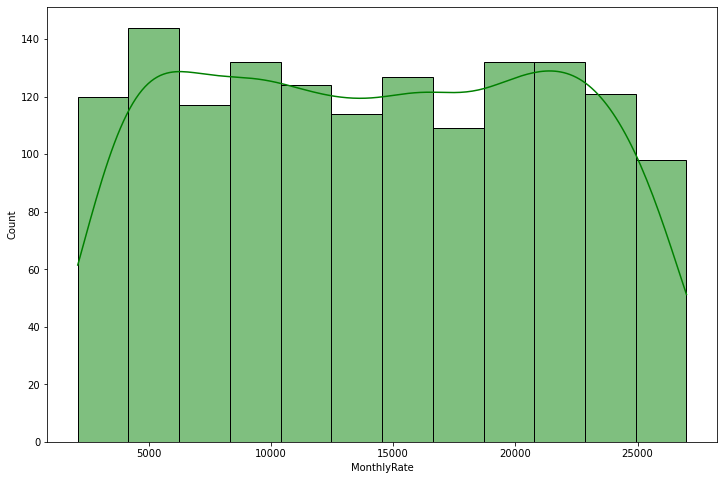

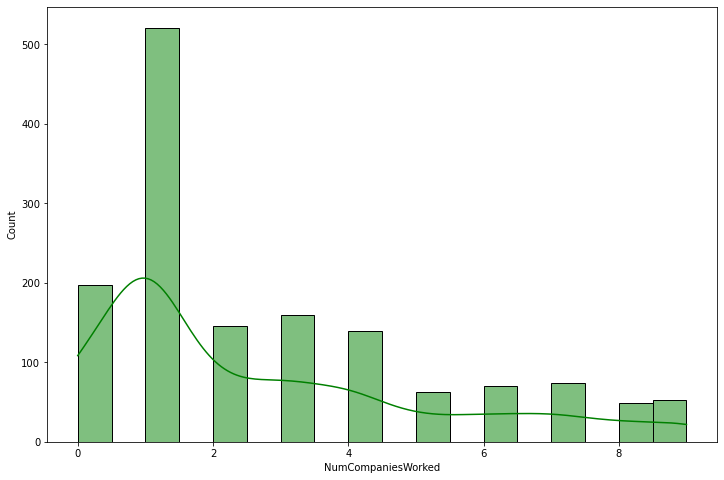

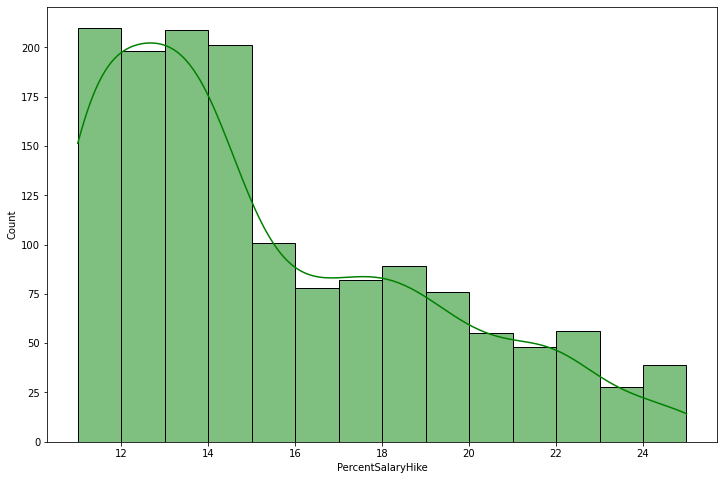

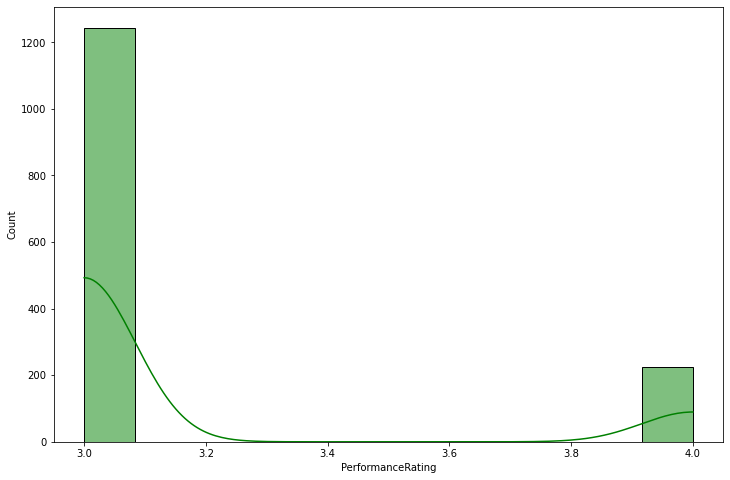

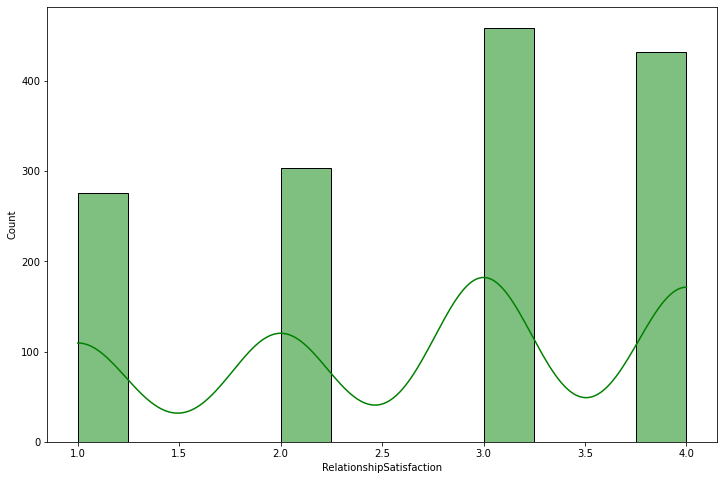

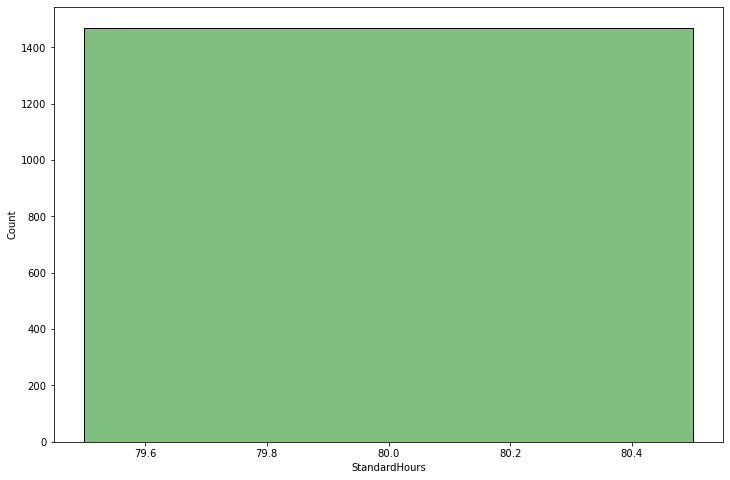

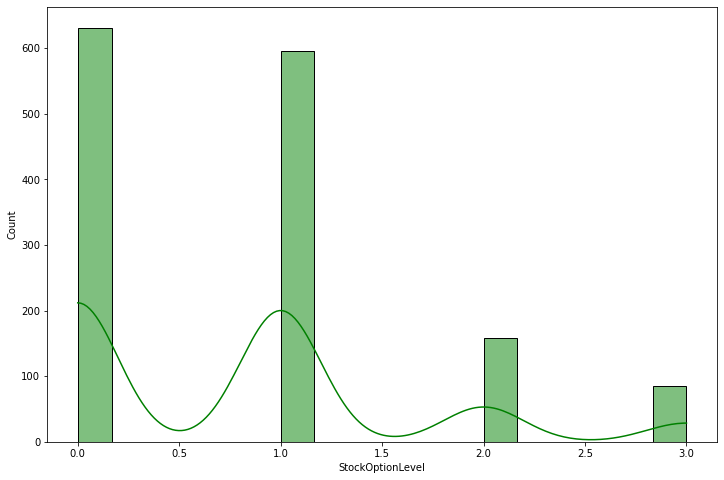

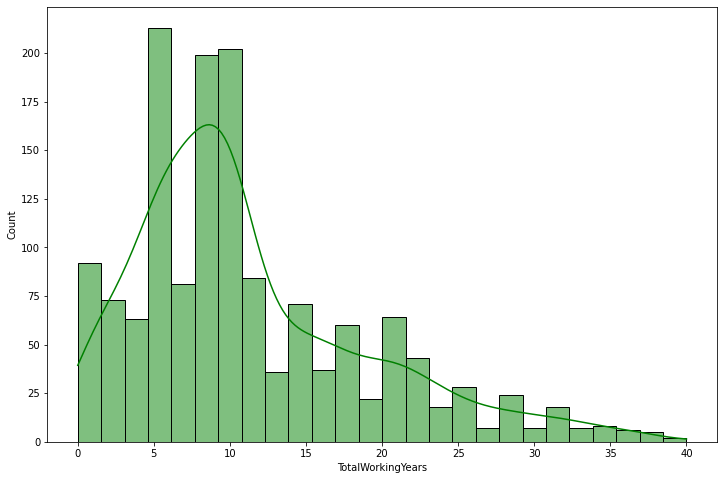

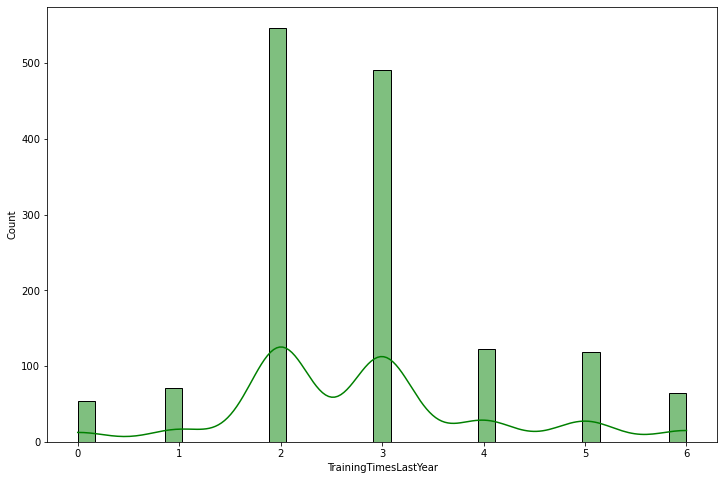

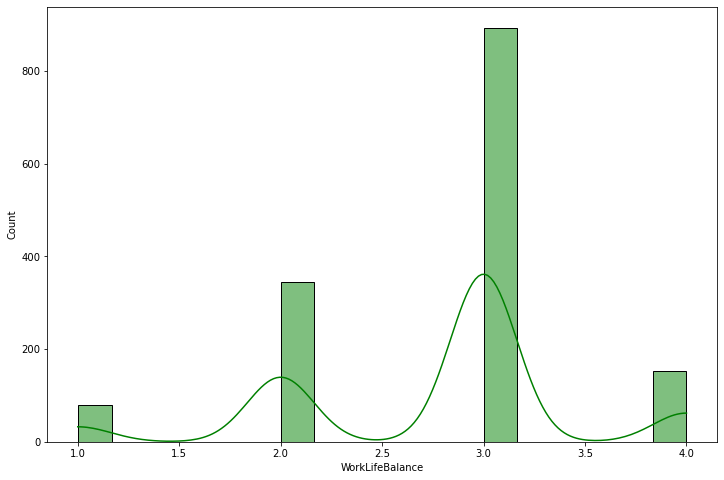

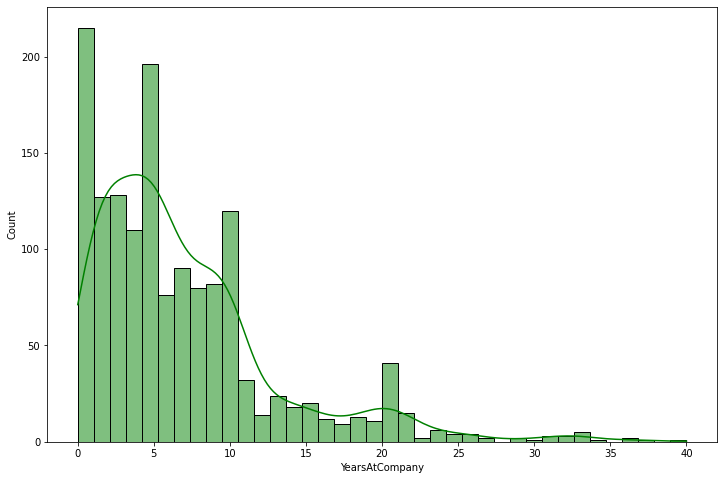

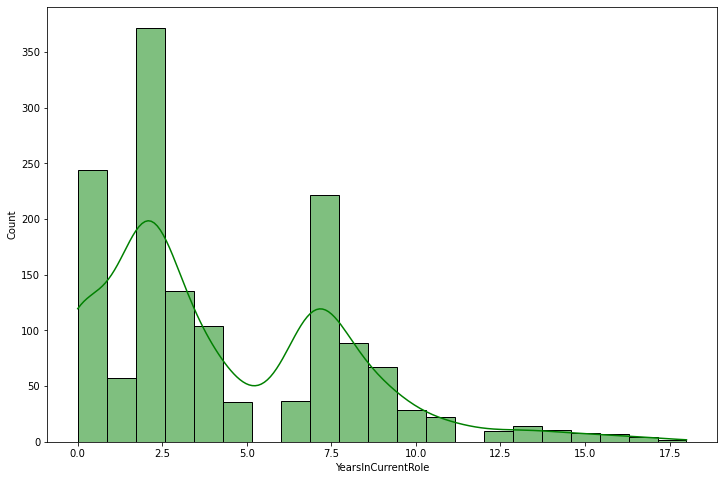

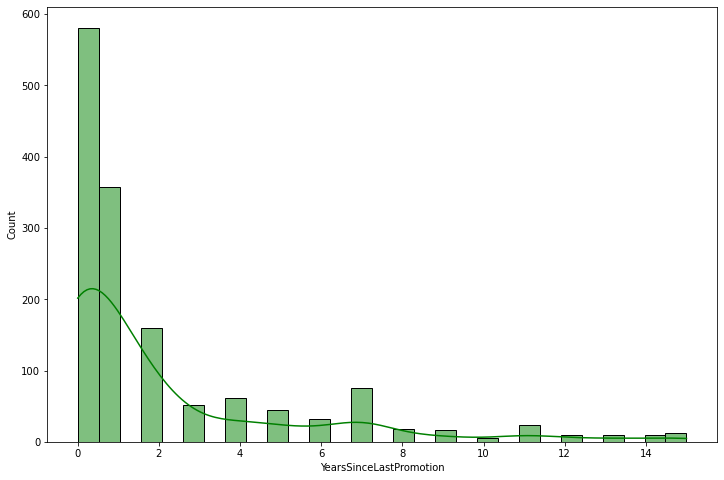

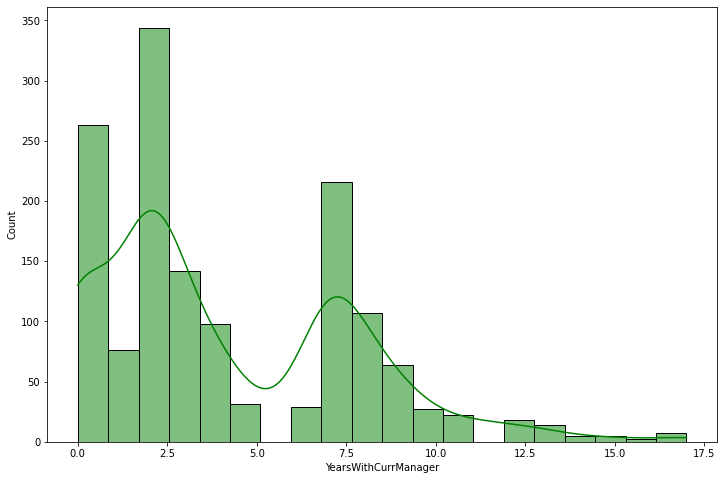

In [18]:
for column in numerical_cols:
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=column, kde=True, color='green', palette="crest")

<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive">Distribution of Numerical columns v/s Attrition rate </h2>
</div>

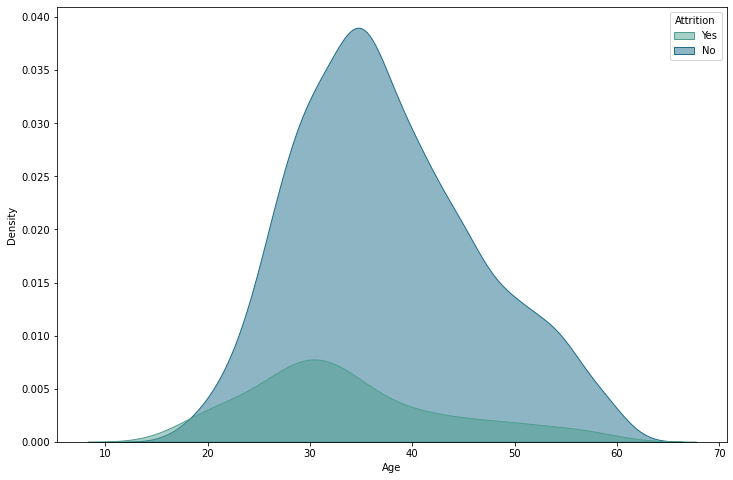

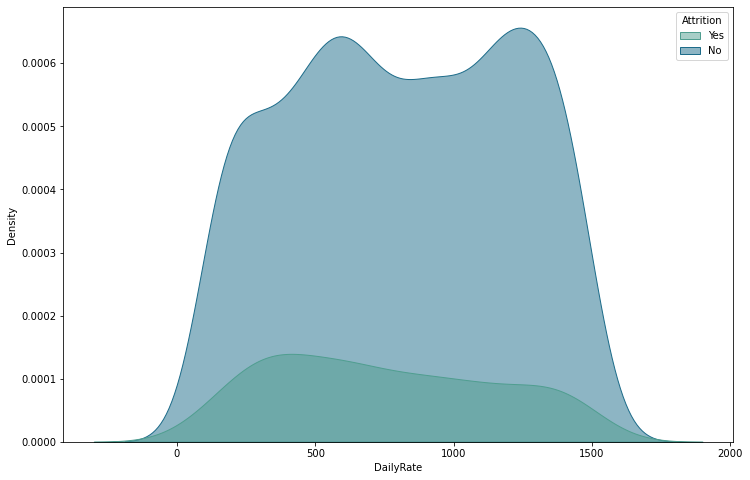

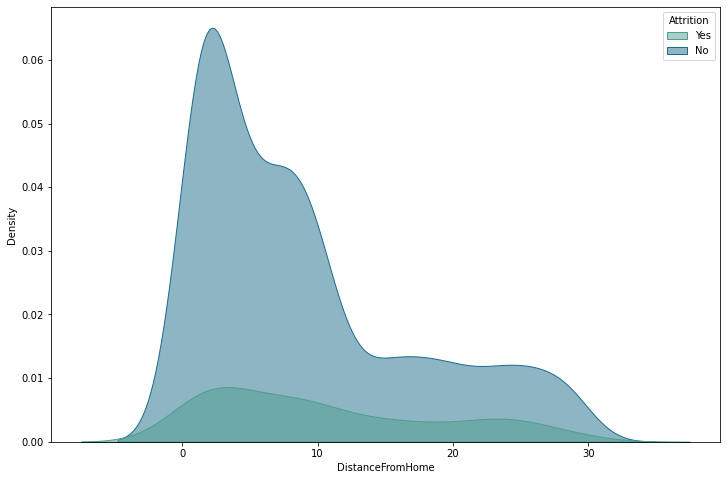

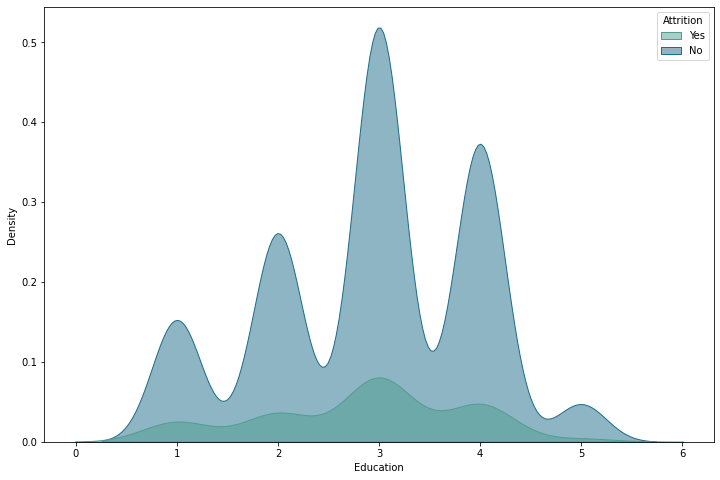

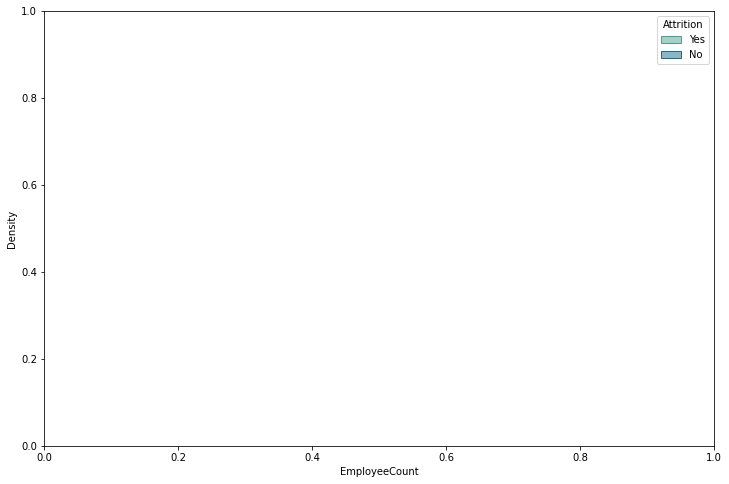

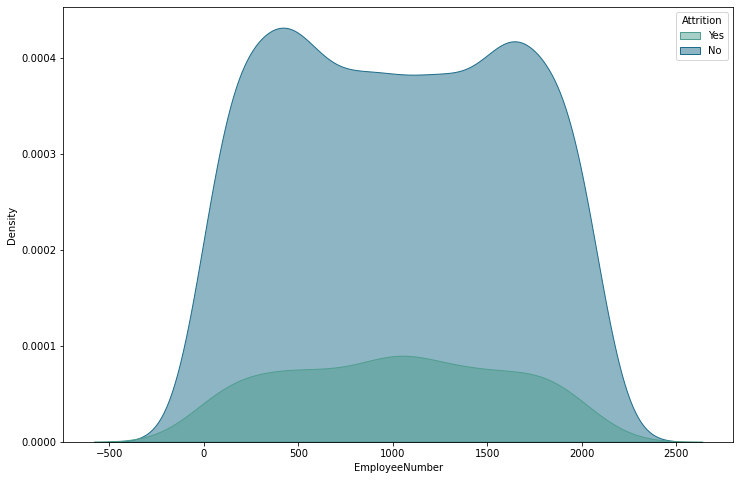

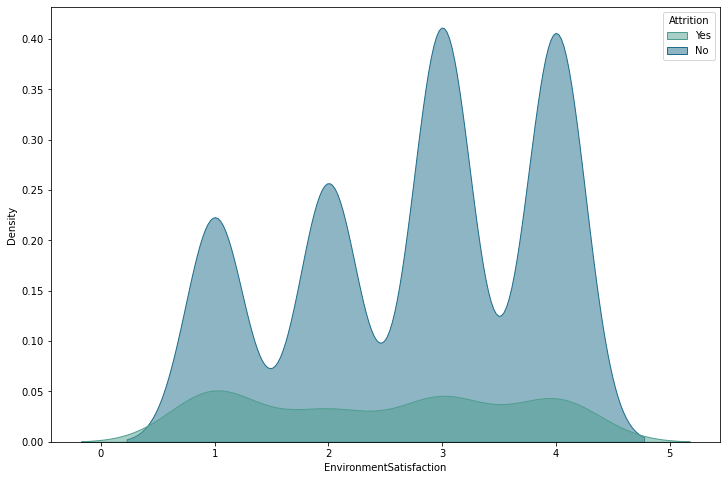

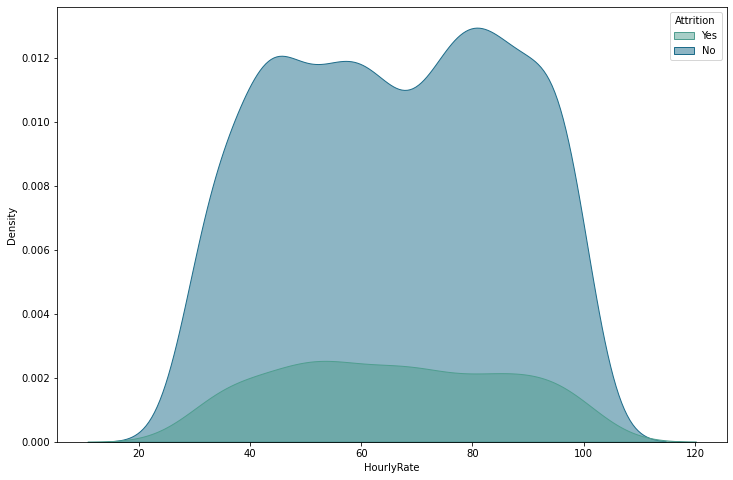

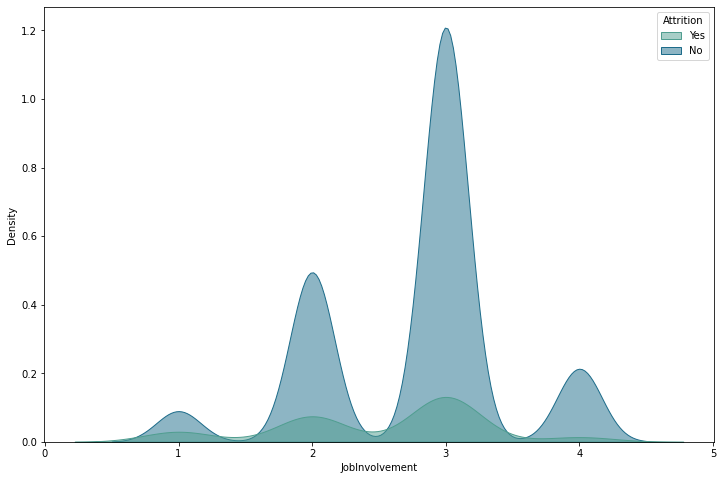

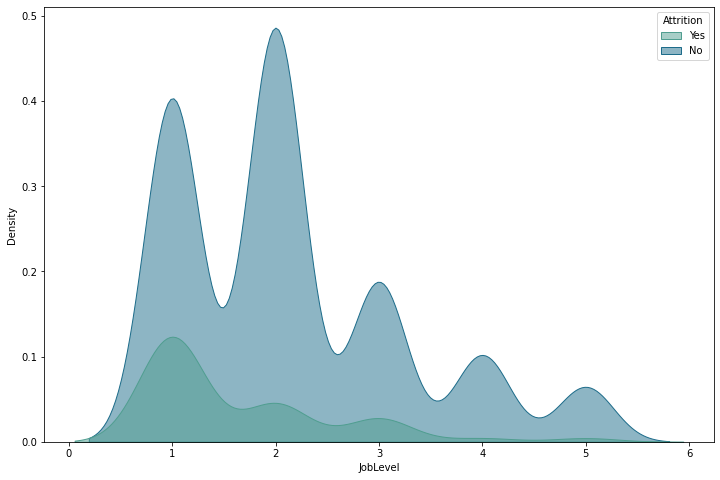

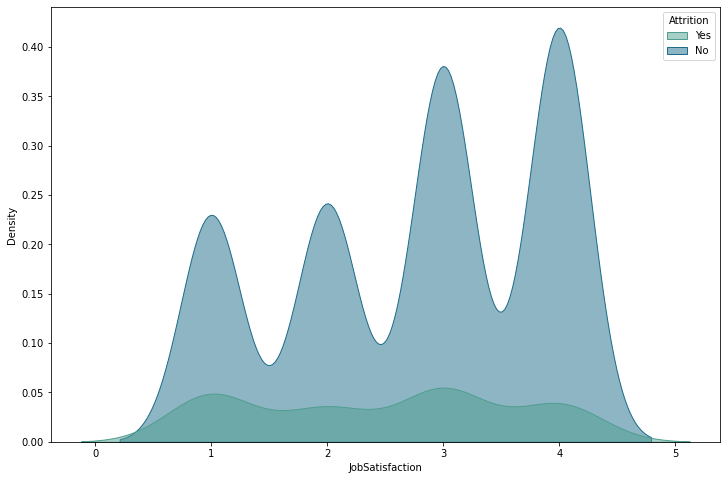

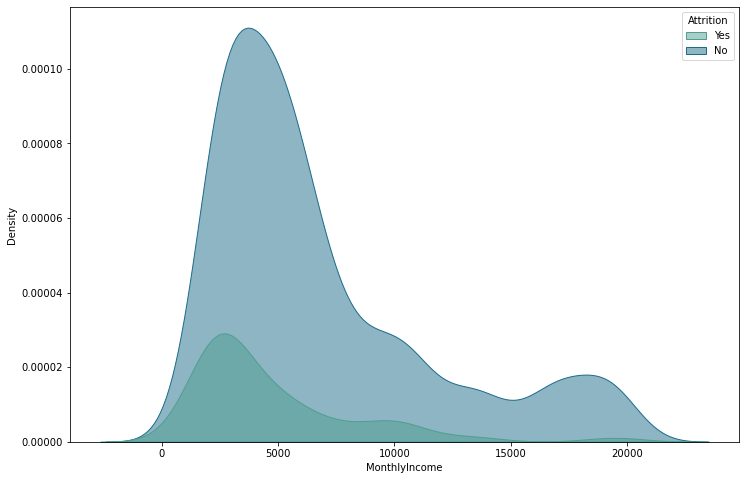

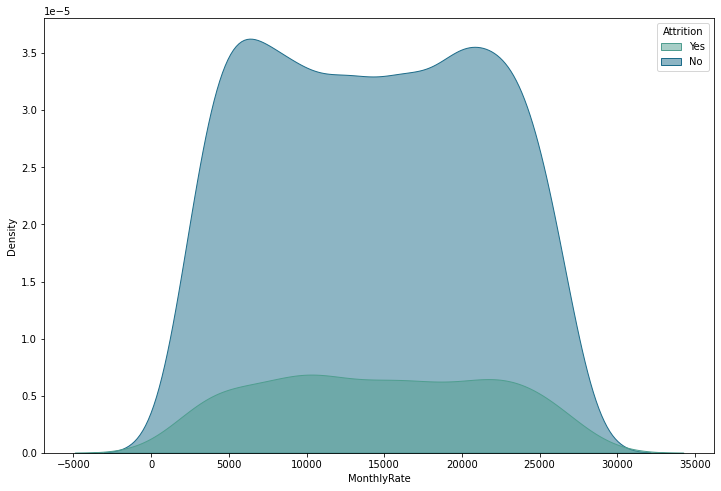

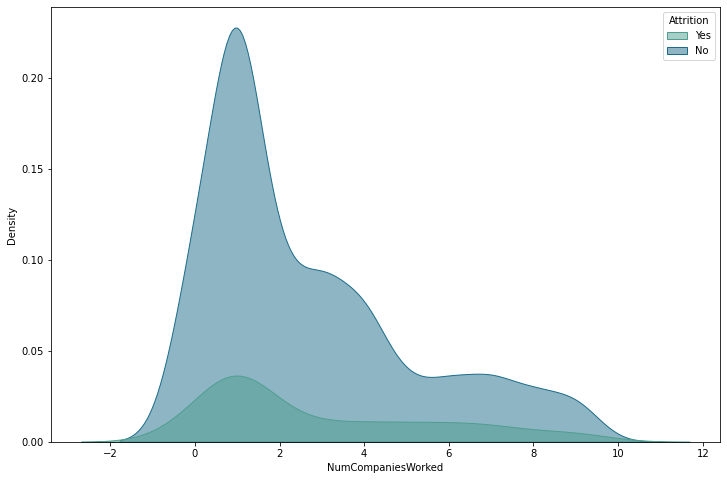

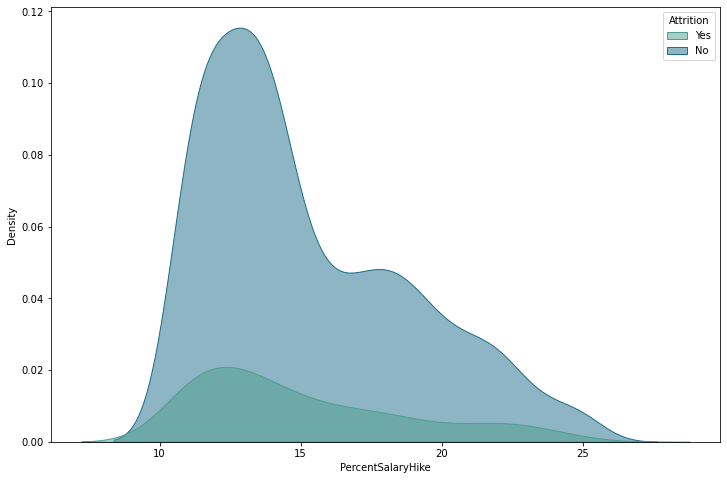

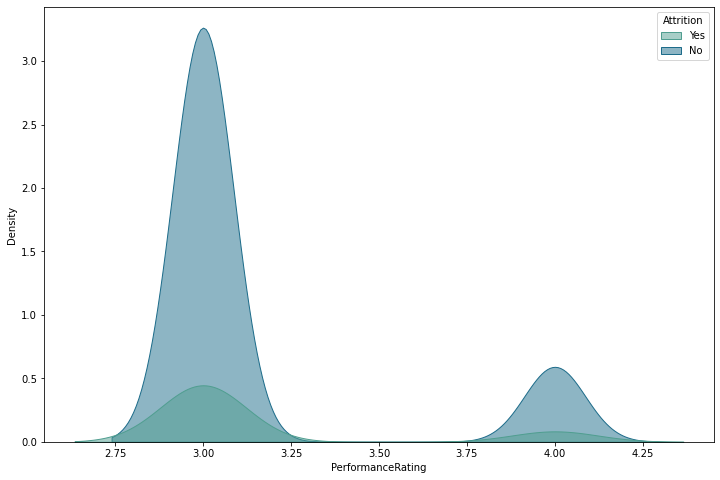

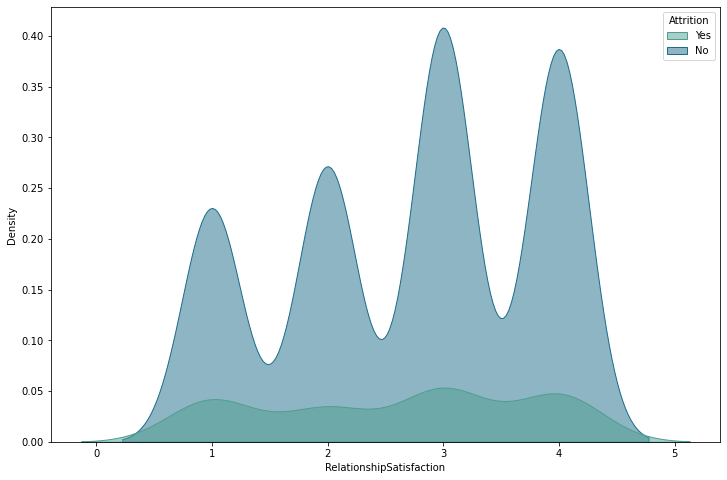

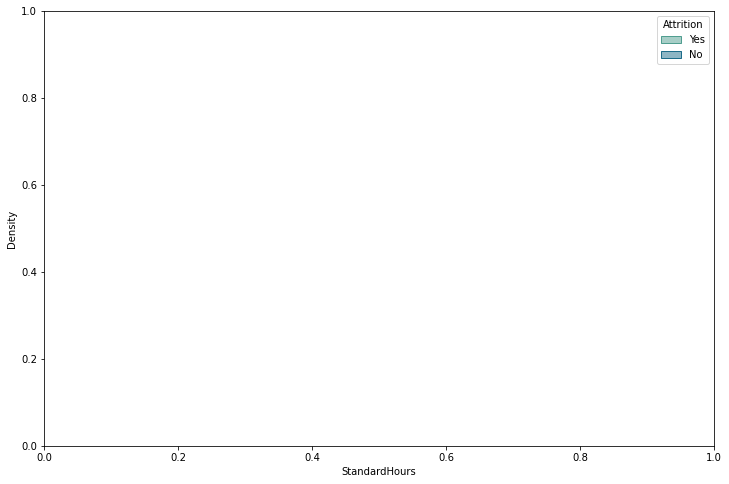

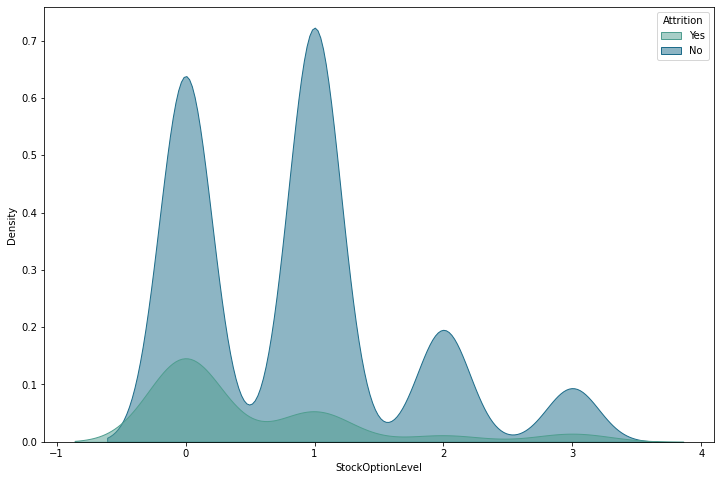

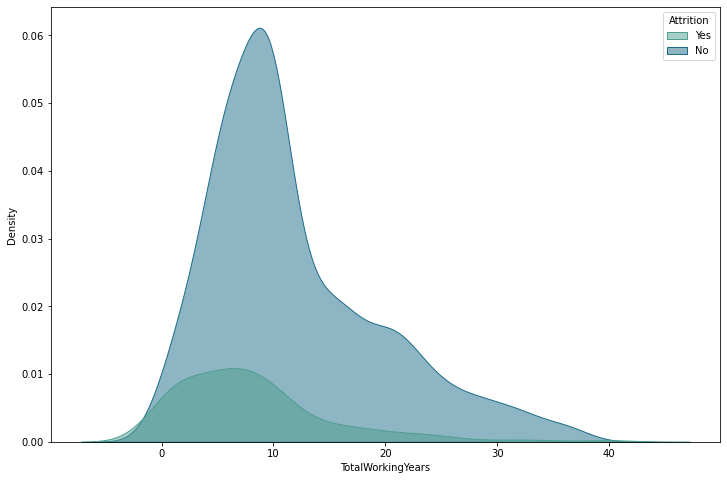

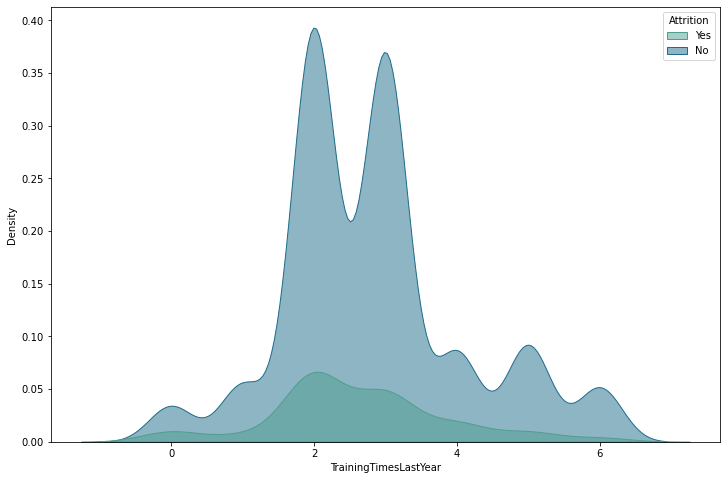

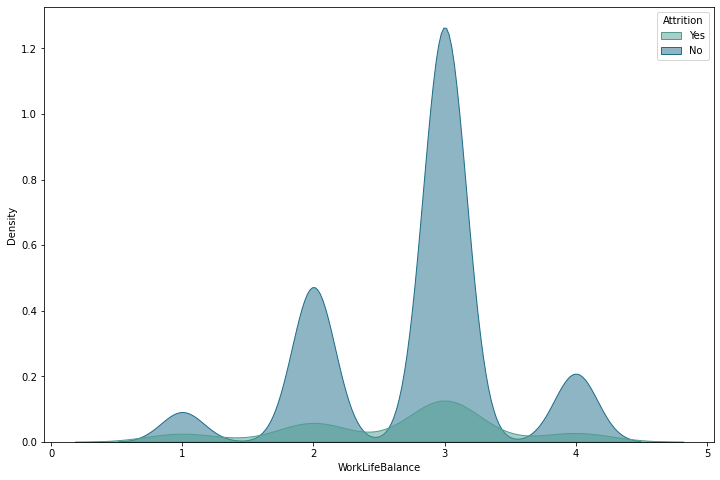

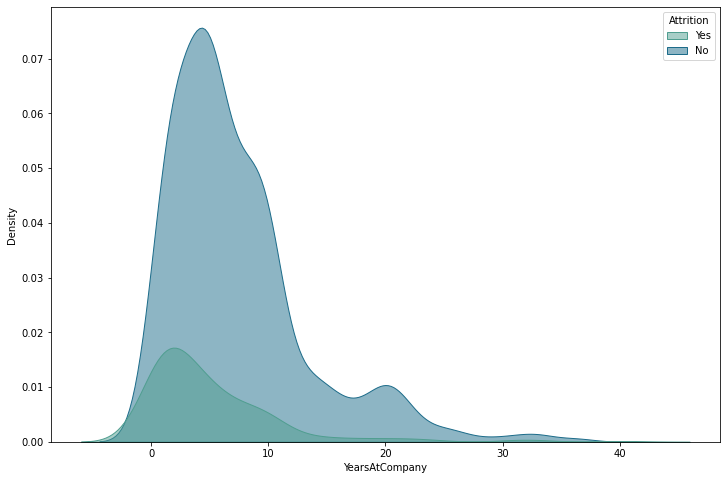

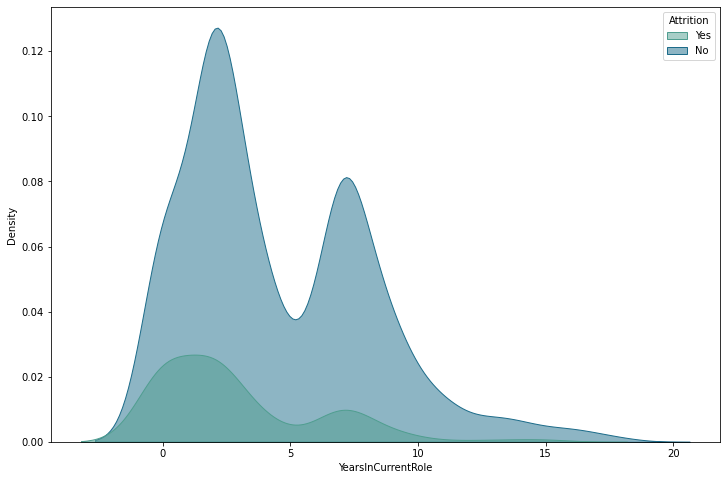

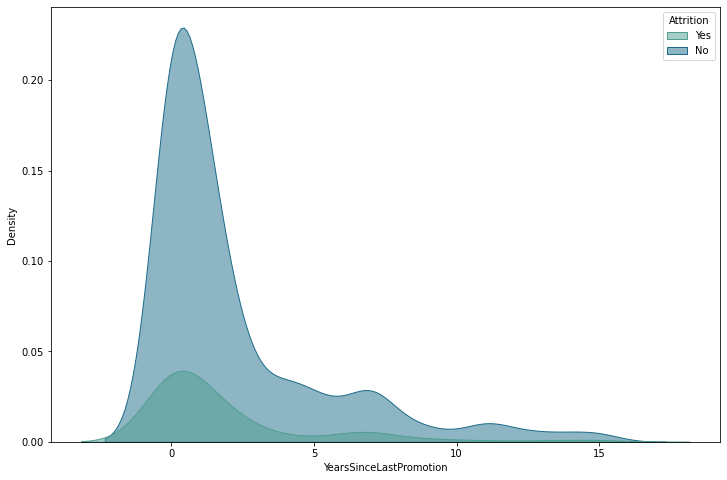

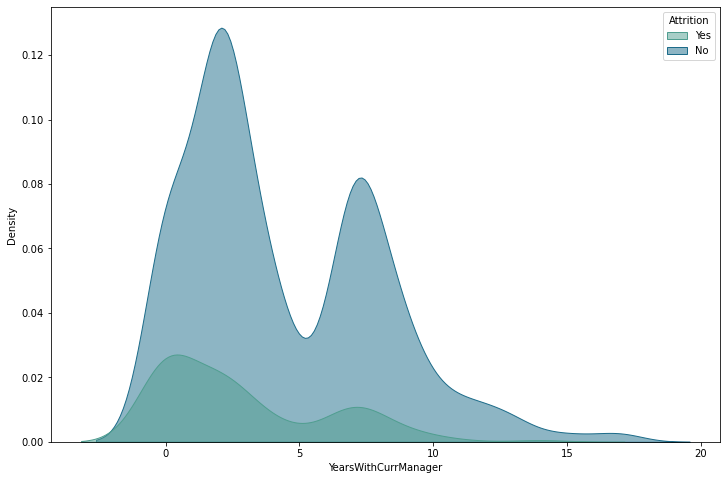

In [19]:
for column in numerical_cols:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=df, x=column, hue="Attrition", fill=True, alpha=.5, palette="crest",color='green')
    plt.show()

<div id="job_title"> 
    <h2  style="color:MediumVioletRed; font-family:Cursive">Correlation Matrix</h2>
</div>

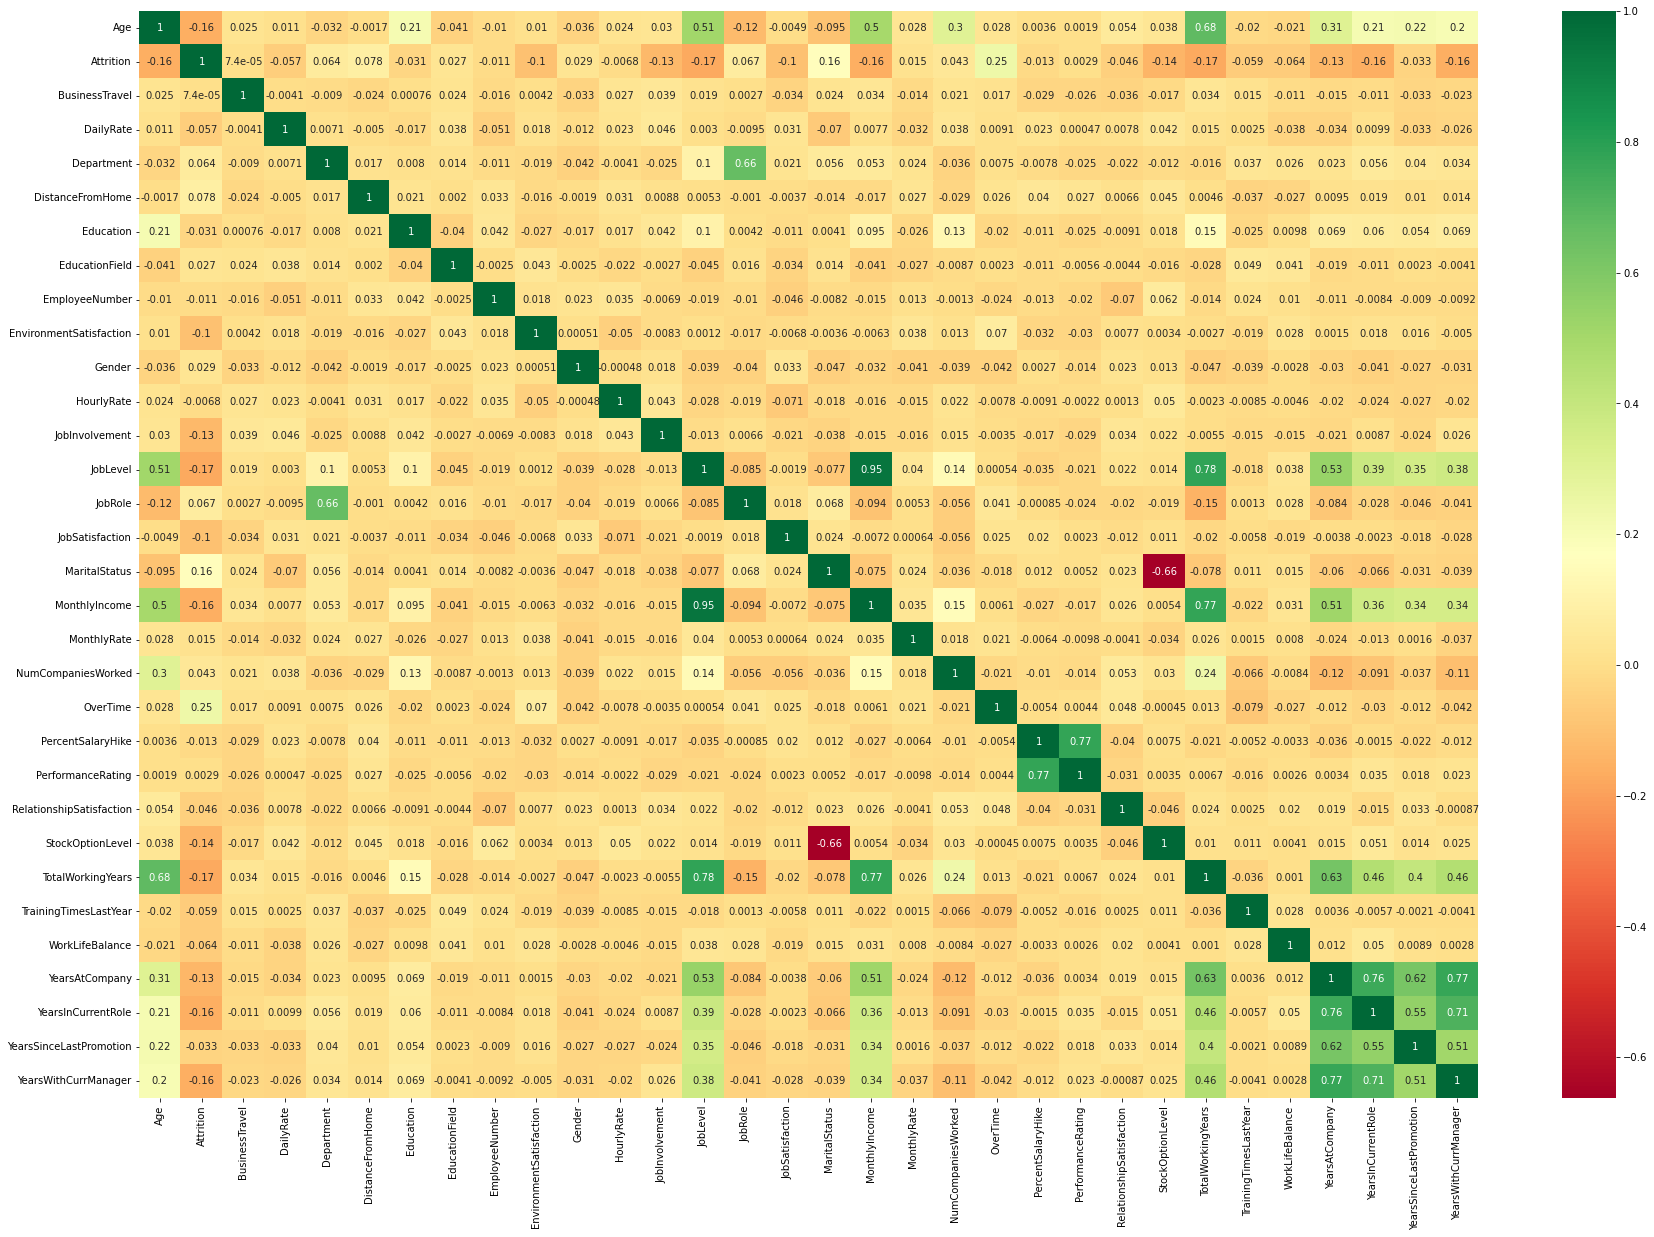

In [20]:
df_corr = df.copy()

encoder = LabelEncoder()
for column in cat_columns:
    df_corr[column] = encoder.fit_transform(df_corr[column])

plt.figure(figsize=(30,20))
df_corr.drop(['Over18','EmployeeCount','StandardHours'],axis=1, inplace=True)
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap="RdYlGn")

In [21]:
corr

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EmployeeNumber           -0.010145  -0.010577       -0.015578  -0.050990   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EmployeeNumber             -0.010895          0.032916   0.042070   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.094961   
MonthlyRate                 0.023642          0.027473  -0.026084   
NumCompaniesWorked         -0.035882         -0.029251   0.126317   
OverTime                    0.007481          0.025514  -0.020322   
Perc

In [22]:
corr_sort = corr['Attrition'].sort_values(ascending=False)

In [23]:
px.bar(corr_sort, color=corr_sort.index)

<div id="exploratory-data-analysis"
     style = "display: fill;
              border-radius: 5px;
              background-color: orange">
    <h4 style = "padding: 15px; 
                 color: black;
                 text-align: left;
                 font-family: Trebuchet MS;">Data Preprocessing and Pipelining
    </h4>
</div>

In [24]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [25]:
X.shape, y.shape

((1470, 34), (1470,))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
print('X_train:',X_train.shape)
print('y_train:', y_train.shape)
print('X_test:',X_test.shape)
print('y_test', y_test.shape)

X_train: (1029, 34)
y_train: (1029,)
X_test: (441, 34)
y_test (441,)


In [28]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
numeric_columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [29]:
categorical_columns = X_train.select_dtypes(include='object').columns
categorical_columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [30]:
numeric_features = Pipeline([('handleMissingValues', SimpleImputer(strategy='median')),
                            ('scaling',StandardScaler(with_mean=True))])
print(numeric_features)

Pipeline(steps=[('handleMissingValues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])


In [31]:
categorical_features = Pipeline([('handleMissingValues', SimpleImputer(strategy='most_frequent')),
                                ('encoding', OneHotEncoder()),
                                ('scaling', StandardScaler(with_mean=False))])
print(categorical_features)

Pipeline(steps=[('handleMissingValues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


In [32]:
processing = ColumnTransformer([('numeric',numeric_features, numeric_columns),
                               ('categorical', categorical_features, categorical_columns)])
processing

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handleMissingValues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate'...
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handleMissingValues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                 


<div id="exploratory-data-analysis"
     style = "display: fill;
              border-radius: 5px;
              background-color: orange">
    <h4 style = "padding: 15px; 
                 color: black;
                 text-align: left;
                 font-family: Trebuchet MS;">Generic Methods for Model Preparation & Metric Evaliation
    </h4>
</div>

In [33]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

In [34]:
def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(12,8))
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

In [35]:
def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

In [36]:
def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

<div id="exploratory-data-analysis"
     style = "display: fill;
              border-radius: 5px;
              background-color: orange">
    <h4 style = "padding: 15px; 
                 color: black;
                 text-align: left;
                 font-family: Trebuchet MS;">Model Preparation
    </h4>
</div>

In [37]:
algorithms = [('bagging classifier', BaggingClassifier()), 
              ('KNN classifier', KNeighborsClassifier()), 
              ('Random Forest calssifier', RandomForestClassifier()), 
              ('Adaboost classifier', AdaBoostClassifier()), 
              ('Gradientboot classifier',GradientBoostingClassifier()),
              ('MLP', MLPClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

In [38]:
pd.DataFrame(model_and_score, index=['values']).T

values
bagging classifier        96.40427599611273%
KNN classifier            86.58892128279884%
Random Forest calssifier  98.83381924198251%
Adaboost classifier       86.78328474246841%
Gradientboot classifier   90.76773566569484%
MLP                       84.64528668610302%

bagging classifier


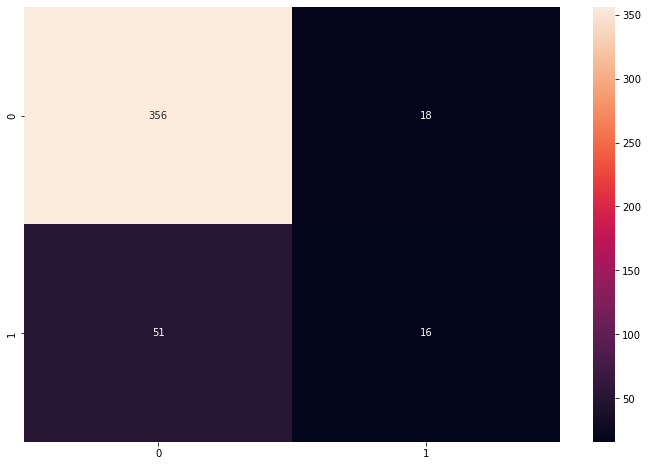

KNN classifier


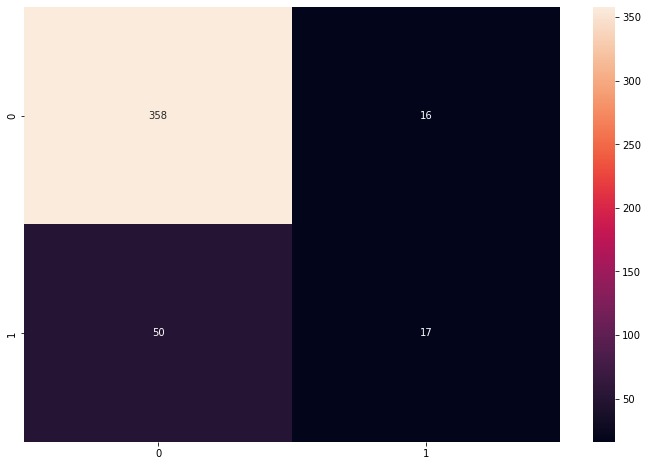

Random Forest calssifier


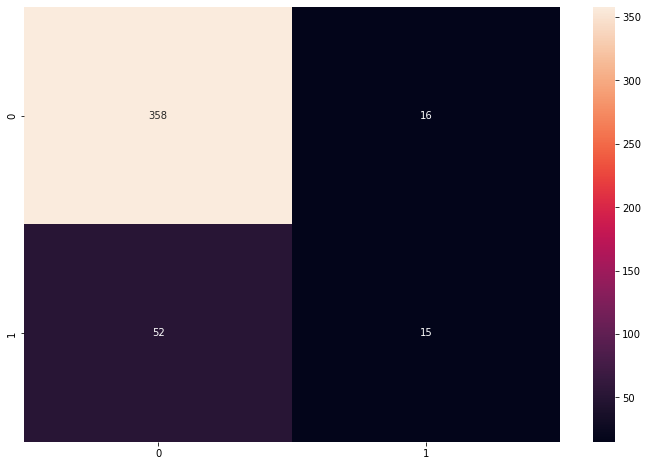

Adaboost classifier


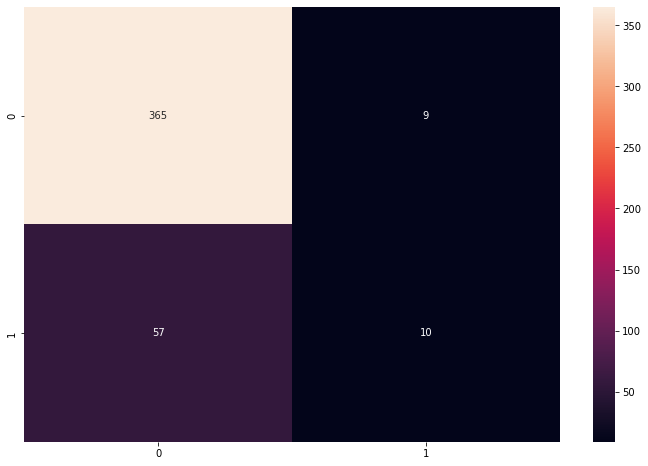

Gradientboot classifier


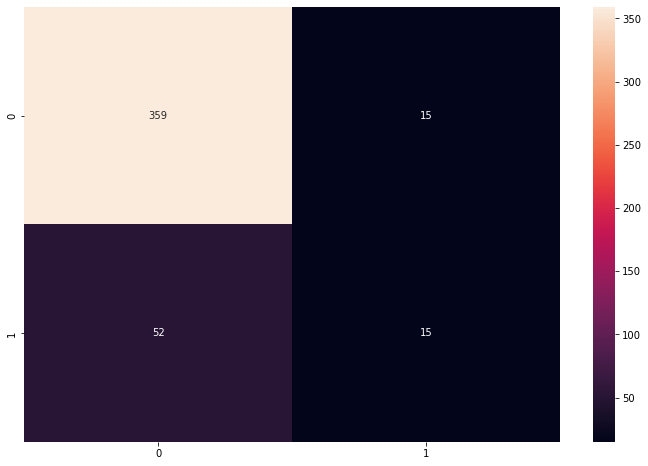

MLP


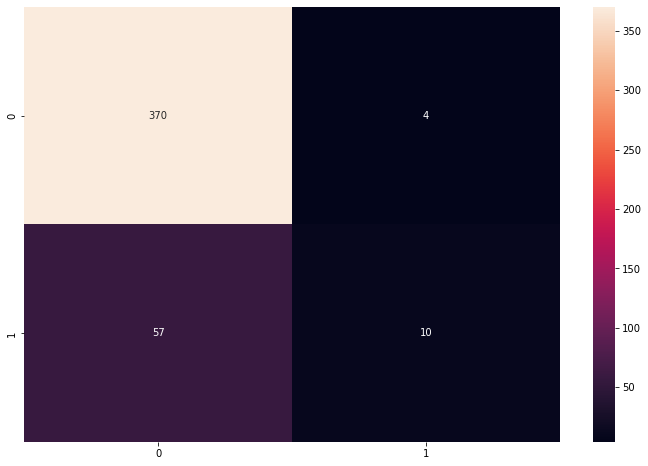

In [39]:
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0], tup[1])

In [40]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

bagging classifier Report :
              precision    recall  f1-score   support

          No       0.87      0.95      0.91       374
         Yes       0.47      0.24      0.32        67

    accuracy                           0.84       441
   macro avg       0.67      0.60      0.61       441
weighted avg       0.81      0.84      0.82       441



KNN classifier Report :
              precision    recall  f1-score   support

          No       0.88      0.96      0.92       374
         Yes       0.52      0.25      0.34        67

    accuracy                           0.85       441
   macro avg       0.70      0.61      0.63       441
weighted avg       0.82      0.85      0.83       441



Random Forest calssifier Report :
              precision    recall  f1-score   support

          No       0.87      0.96      0.91       374
         Yes       0.48      0.22      0.31        67

    accuracy                           0.85       441
   macro avg       0.68      0.59     

<div id="exploratory-data-analysis"
     style = "display: fill;
              border-radius: 5px;
              background-color: orange">
    <h4 style = "padding: 15px; 
                 color: black;
                 text-align: left;
                 font-family: Trebuchet MS;">ROC Curve
    </h4>
</div>

bagging classifier


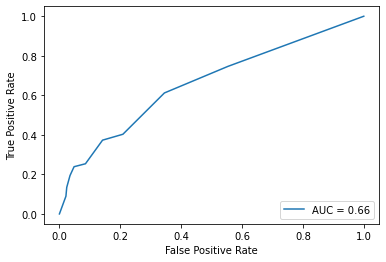

KNN classifier


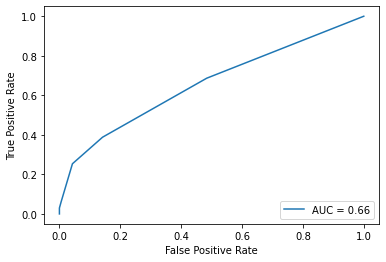

Random Forest calssifier


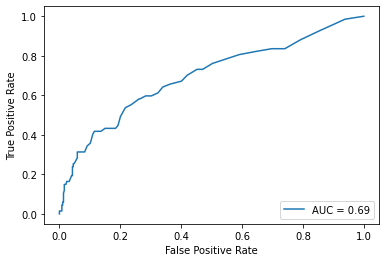

Adaboost classifier


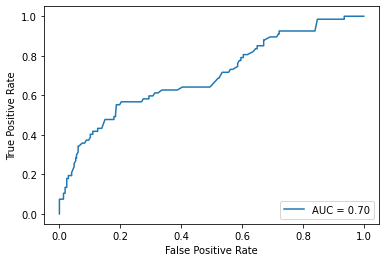

Gradientboot classifier


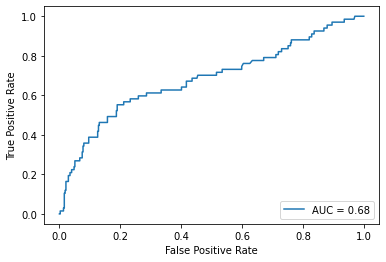

MLP


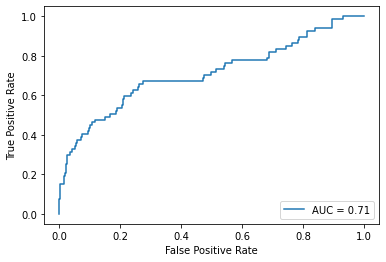

In [41]:
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)

for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0], tup[1])

<div id="exploratory-data-analysis"
     style = "display: fill;
              border-radius: 5px;
              background-color: orange">
    <h4 style = "padding: 15px; 
                 color: black;
                 text-align: left;
                 font-family: Trebuchet MS;">Inferences and Conclusions 
    </h4>
</div>


We've drawn many inferences from the survey. Here's a summary of a few of them:

1) We can observe that most of the employees in the organisation travel rarely. 

2) The majority of the employees are working in the research and development department. 

3) The departments contained in the datasets are: <br>
a) Research and development <br>
b) Sales <br>
c) Human Resources <br>

4) Employees' educational fields are <br>
a) Life Sciences <br>
b) Medical <br>
c) Marketing <br>
d) Technical degree <br>
e) Human Resources <br>
f) Other <br>

5) The majority of employees have the following educational backgrounds: <br>
a) Background in Life Sciences <br>
b) Medicine <br>

6) 60% of the employees in the organisation are males and the remaining 40% are females. <br>

7) Employees are working in the following job roles: <br>
a) Sales Excutive <br>
b) Research Scientist <br>
c) Laboratory Technician <br>
d) Manufacturing Director <br>
e) Healthcare Representative <br>
f) Manager <br>
g) Sales Representative <br>
h) Research Director <br>
i) Human Resources <br>

8) 45.8% of the employees working for the organisation are married.  <br>
9) 22.2% of the employees working in the organisation are divorced. <br>
10) 28.3% of the employees are likely to work overtime in the organization. <br>

11) The attrition rate of employees shows a decreasing trend if the employees have been working with their current manager for a long time. <br>

12) Showing a high percentage of attrition after 6 months of promotion. Those with between 5 and 15 years since their last promotion show the least amount of attrition among employees. <br>

13) Showing less attrition if employees are working in the same job role. <br>

14) Employees have a high percentage of attrition, with an average tenure of 2 to 4 years. <br>

15) The stock option level and attrition rate are negatively correlated. If employees have fewer stock option levels, a high trend in the attrition rate. <br>

16) Showing a lower attrition rate, if employees are working far from home (distance from home). <br>

17) After 35 years of age, people are less likely to switch organisations.  <br>

<div id="exploratory-data-analysis"
     style = "display: fill;
              border-radius: 5px;
              background-color: orange">
    <h4 style = "padding: 15px; 
                 color: black;
                 text-align: left;
                 font-family: Trebuchet MS;">Inferences and Conclusions 
    </h4>
</div>

Employees Attrition Data: https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition?select=HR+Employee+Attrition.csv <br>Plotly user guide : https://plotly.com/python/bar-charts/ <br>
Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html <br>
Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html <br>
opendatasets Python library: https://github.com/JovianML/opendatasets <br>